# Metric Analysis for Models

## All the models in a partially known map with the beginning and goal positions randomly generated

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('models_data.csv')
df['final_robot_position'] = df['final_robot_position'].apply(lambda x: eval(x))
df['goal_position'] = df['goal_position'].apply(lambda x: eval(x))
df.shape

(6000, 5)

In [3]:
def calculate_win_rate(dataframe):
    total_games = dataframe.shape[0]
    total_wins = dataframe['win'].sum()
    return (total_wins / total_games) * 100 if total_games > 0 else 0

In [4]:
def plot(values, title, y_label, x_label = 'Model Names', color='blue'):
    plt.figure(figsize=(10, 5))
    plt.bar(model_names, values, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [5]:
# Function to calculate Euclidean distance between two points (tuples)
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Updated loop to calculate metrics
model_names = []
success_rates = []
mean_times = []
mean_distances = []

for model in df['model_name'].unique():
    model_df = df[df['model_name'] == model]
    success_rate = calculate_win_rate(model_df)
    
    mean_time = model_df['time'].mean()

    # Calculate mean distance when the robot did not win
    not_won_df = model_df[model_df['win'] == 0]
    distances = not_won_df.apply(lambda row: euclidean_distance(row['final_robot_position'], row['goal_position']), axis=1)
    mean_distance = distances.mean() if not distances.empty else 0

    # Append to lists
    model_names.append(model)
    success_rates.append(success_rate)
    mean_times.append(mean_time)
    mean_distances.append(mean_distance)

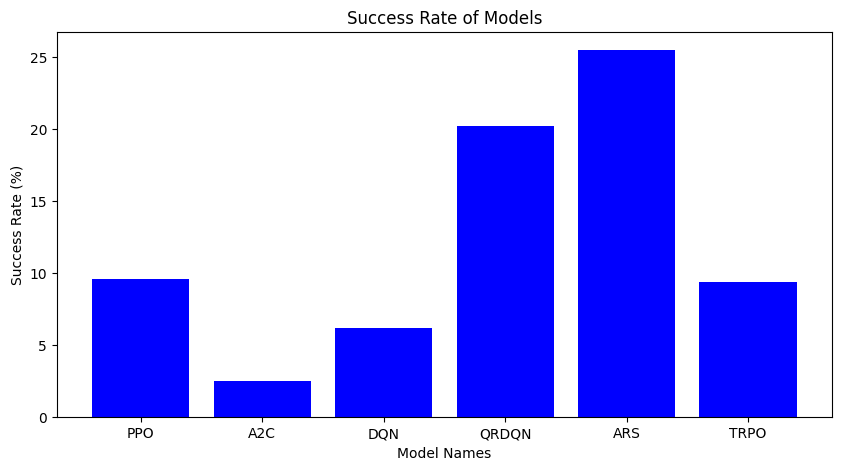

In [6]:
plot(success_rates,
     x_label='Model Names',
     y_label='Success Rate (%)',
     title='Success Rate of Models',
     color='blue')

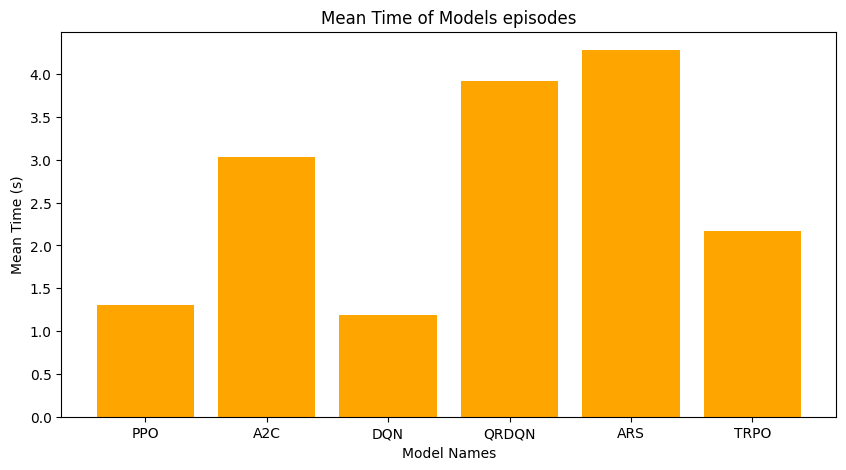

In [7]:
plot(mean_times,
     x_label='Model Names',
     y_label='Mean Time (s)',
     title='Mean Time of Models episodes',
     color='orange')

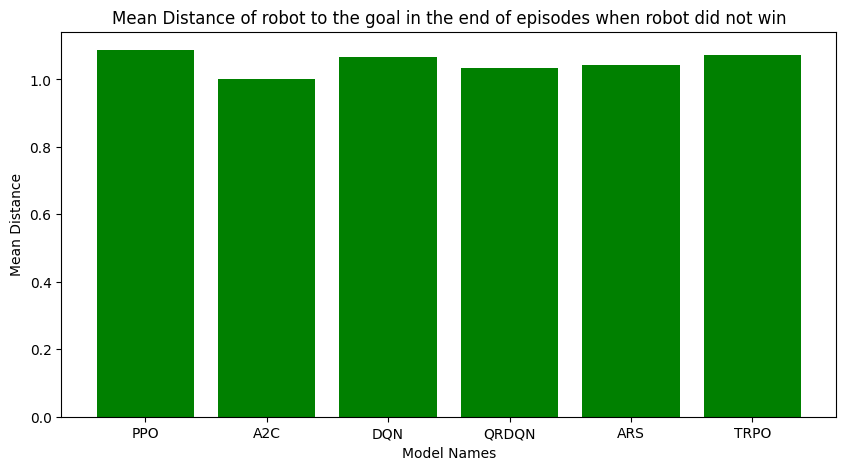

In [8]:
plot(mean_distances,
     x_label='Model Names',
     y_label='Mean Distance',
     title='Mean Distance of robot to the goal in the end of episodes when robot did not win',
     color='green')

## ARS model in a completely unknown map

In [9]:
ars_df = pd.read_csv('final_test_data.csv')
ars_df['final_robot_position'] = ars_df['final_robot_position'].apply(lambda x: eval(x))
ars_df['goal_position'] = ars_df['goal_position'].apply(lambda x: eval(x))
df.shape

(6000, 5)

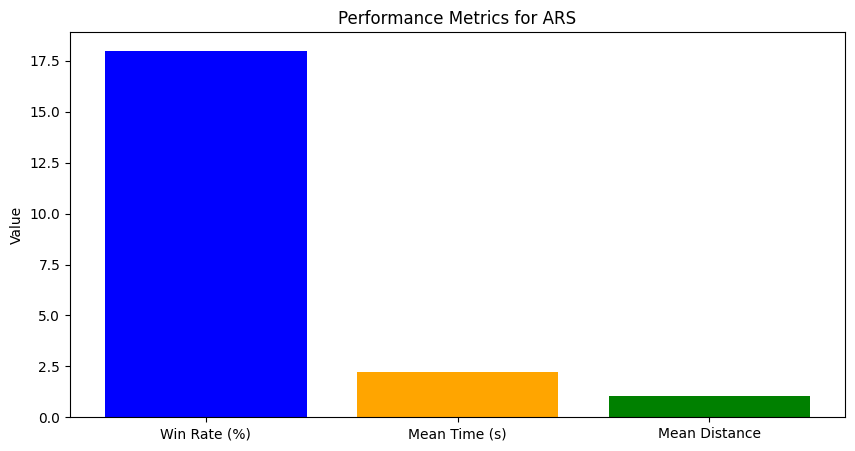

In [10]:
# Calculating metrics for the model "ARS"
win_rate = (ars_df[ars_df['model_name'] == 'ARS']['win'].mean()) * 100
mean_time = ars_df[ars_df['model_name'] == 'ARS']['time'].mean()
distances = ars_df[(ars_df['model_name'] == 'ARS') & (ars_df['win'] == 0)].apply(
    lambda row: euclidean_distance(row['final_robot_position'], row['goal_position']), axis=1)
mean_distance = distances.mean() if not distances.empty else 0

# Plotting
labels = ['Win Rate (%)', 'Mean Time (s)', 'Mean Distance']
values = [win_rate, mean_time, mean_distance]
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=colors)
plt.ylabel('Value')
plt.title('Performance Metrics for ARS')
plt.show()